<a href="https://colab.research.google.com/github/eng-akash/machine-learning/blob/main/Copy_of_RedWineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality Prediction
In this notebook, we will predict the quality of wine using a linear regression model. We start by importing the necessary libraries, loading the dataset, and then proceed to preprocess the data, build the model, and evaluate its performance.

## 1. Uploading the Dataset
We begin by uploading the dataset that contains various chemical properties of wine along with their quality ratings.

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving redwinequality.csv to redwinequality (2).csv


# 2. Importing Necessary Libraries
We import essential libraries for data manipulation, visualization, and machine learning:

* numpy: For numerical computations.
* pandas: For data manipulation and analysis.
* matplotlib and seaborn: For data visualization.
* sklearn: For machine learning tasks, including model training and evaluation.

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing Dataset using Pandas
To begin analyzing the data, we'll first need to import the dataset into our Python environment. We'll be using the pandas library, which is a powerful tool for data manipulation and analysis

In [ ]:
# Importing dataset
df = pd.read_csv('redwinequality.csv')


# Printing the Dataset
Once the dataset has been loaded into a pandas DataFrame, you might want to view the entire dataset or a portion of it. To print the dataset, you can simply use the 'print()' function.

In [ ]:
# print dataset
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Removing Outliers Using the IQR Method
Outliers can have a significant impact on the results of your analysis. One common method for detecting and removing outliers is the Interquartile Range (IQR) method. The following code demonstrates how to remove outliers from a DataFrame using this method.

### Step 1: Define the Function
### Step 2: Specify the Columns to Clean
### Step 3: Apply the Function to the DataFrame

In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_clean = ['fixed acidity',  'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' ,'free sulfur dioxide' , 'total sulfur dioxide'  ,'density' ,   'pH',  'sulphates' ,'alcohol','quality']

cleaned_data = remove_outliers_iqr(df.copy(), columns_to_clean)
print(cleaned_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

#Splitting the Dataset
In this section, we are preparing our dataset for training and testing a machine learning model. The goal is to split the data into two sets: one for training the model and the other for testing its performance.

In [ ]:
from sklearn.model_selection import train_test_split
x=df[['fixed acidity',  'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' ,'free sulfur dioxide' , 'total sulfur dioxide'  ,'density' ,   'pH',  'sulphates','alcohol']]
y=df[['quality']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#Implementing Linear Regression in Python
In this section, we apply linear regression, a fundamental machine learning algorithm, to predict a target variable based on a set of features. The process involves training the model on a training dataset and then making predictions on a testing dataset.

In [ ]:

from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

#Evaluating the Performance of a Linear Regression Model
After training a linear regression model and making predictions, it's crucial to assess the model's performance. This section demonstrates how to calculate key evaluation metrics, such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²), to understand how well the model predicts the target variable.

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score



mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.39002514396395427
R-squared: 0.403180341279623


#Visualizing the Distribution of Wine Quality Ratings
In this section, we create a pie chart to visualize the distribution of the 'quality' variable in the dataset. This helps us understand the proportion of different quality ratings within the data, giving us a clear overview of how wine quality is distributed.

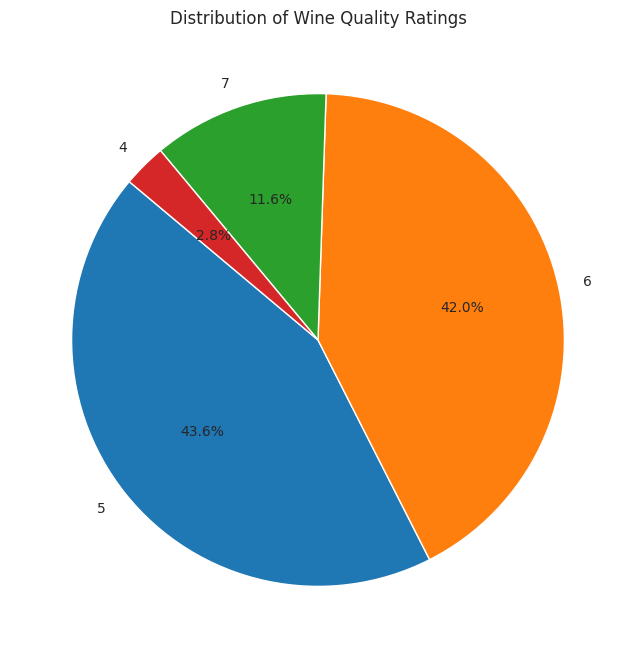

In [ ]:

# Visualizing the distribution of the 'quality' variable using a pie chart
quality_counts = cleaned_data['quality'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

# Visualizing Feature Distributions with KDE Plots
In this section, we create Kernel Density Estimate (KDE) plots for several features in the dataset. KDE plots help visualize the distribution of data by smoothing it into a continuous probability density curve, offering insights into the underlying structure of the dataset.



<ipython-input-23-99a378711be3>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-23-99a378711be3>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-23-99a378711be3>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-23-99a378711be3>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-23-99a378711be3>:13: FutureWarning: 

`shade` is now deprecated i

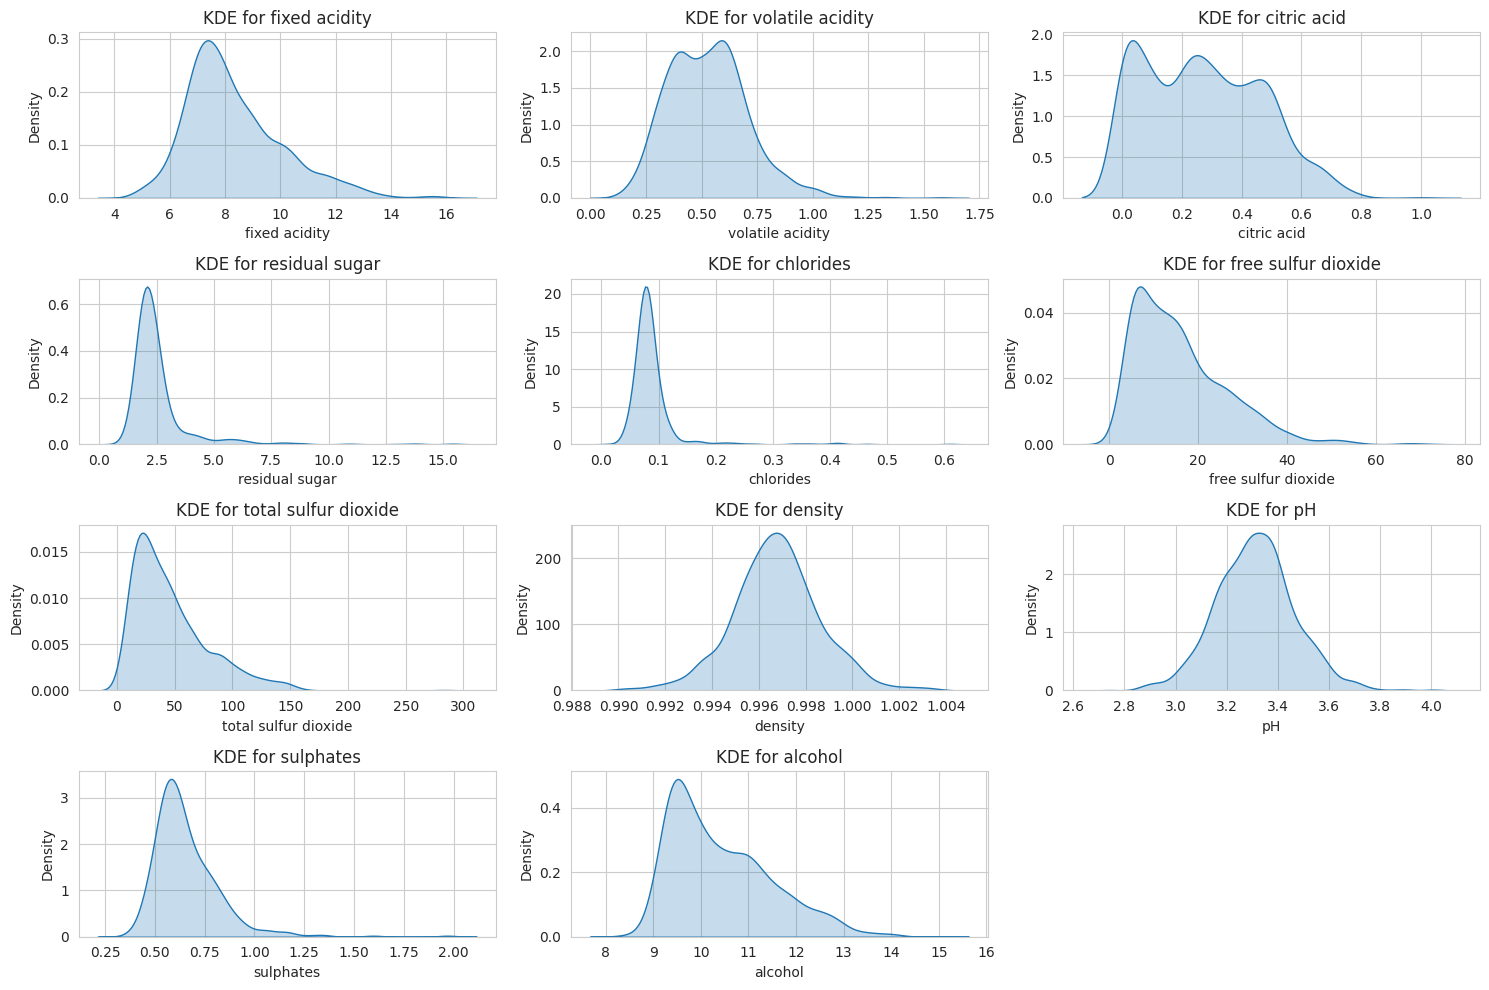

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# List of columns to plot
columns_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'density', 'pH', 'sulphates', 'alcohol']

# Plotting KDE plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the layout as needed
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE for {column}')

plt.tight_layout()
plt.show()

#Comparing Actual and Predicted Values
In this section, we reshape the arrays for actual and predicted values if necessary, and then create a DataFrame to compare these values side by side. This comparison helps in understanding how well the model's predictions align with the actual outcomes.

In [ ]:
# Reshape if necessary
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Create the DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

    Actual  Predicted
0        6   5.346664
1        5   5.056313
2        6   5.664470
3        5   5.464515
4        6   5.725185
5        5   5.279287
6        5   5.034217
7        5   5.126233
8        5   5.745343
9        6   5.686650
10       7   6.139597
11       3   5.233869
12       5   5.549915
13       5   5.258253
14       6   5.448105
15       7   6.468290
16       5   5.150181
17       7   5.591052
18       8   6.556066
19       5   5.322558
20       5   5.391839
21       6   5.196108
22       5   5.944757
23       6   6.361976
24       6   5.354849


#Visualizing Actual vs. Predicted Values with a Bar Chart
In this section, we create a bar chart to visualize the comparison between actual and predicted values. This graphical representation makes it easier to see how closely the model’s predictions match the true values.

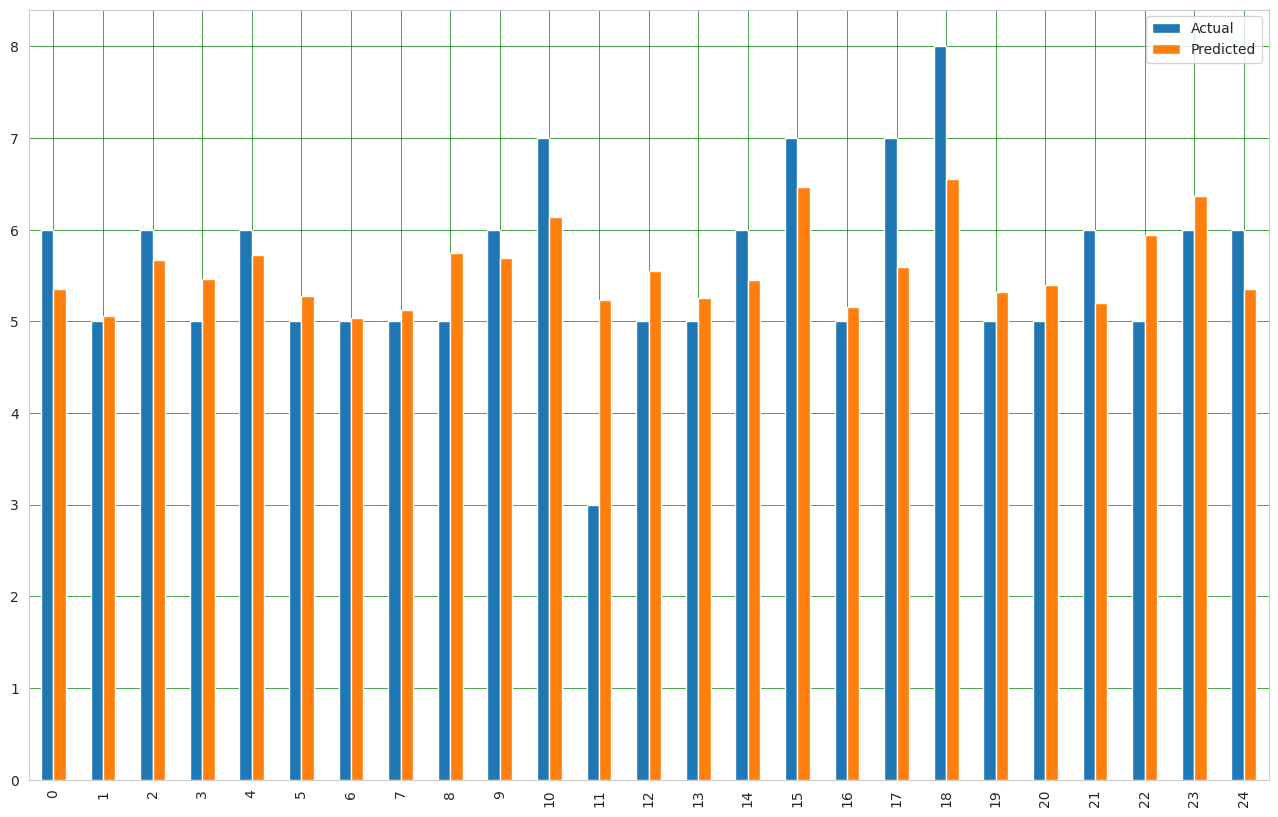

In [ ]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, for example :

Need more data: We need to have a huge amount of data to get the best possible prediction.

Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.